In [3]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(dpi=1200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

<Figure size 7200x4800 with 0 Axes>

In [4]:
#import the dataset with pandas
df = pd.read_excel('C:/Users/Paul/Desktop/team-tidy-main/team-tidy-main/salary/salary_data_states.xlsx')

In [5]:
#clean the dataset, removing unnecessary columns
salary = df.drop(columns=['PREVAILING_WAGE_SUBMITTED', 'PREVAILING_WAGE_SUBMITTED_UNIT', 'PAID_WAGE_SUBMITTED', 'PAID_WAGE_SUBMITTED_UNIT'])

In [6]:
#clean the dataset, remove nas
salary['EDUCATION_LEVEL_REQUIRED'] = salary['EDUCATION_LEVEL_REQUIRED'].fillna("Nothing")
salary['COLLEGE_MAJOR_REQUIRED'] = salary['COLLEGE_MAJOR_REQUIRED'].fillna("Nothing")
salary['EXPERIENCE_REQUIRED_Y_N'] = salary['EXPERIENCE_REQUIRED_Y_N'].fillna("n")
salary['EXPERIENCE_REQUIRED_NUM_MONTHS'] = salary['EXPERIENCE_REQUIRED_NUM_MONTHS'].fillna(0)
salary['COUNTRY_OF_CITIZENSHIP'] = salary['COUNTRY_OF_CITIZENSHIP'].fillna("Unknown")
salary['WORK_POSTAL_CODE'] = salary['WORK_POSTAL_CODE'].fillna("Unknown")
salary['FULL_TIME_POSITION_Y_N'] = salary['FULL_TIME_POSITION_Y_N'].fillna("n")
salary['PREVAILING_WAGE_PER_YEAR'] = salary['PREVAILING_WAGE_PER_YEAR'].fillna(0)
salary['WORK_CITY'] = salary['WORK_CITY'].fillna("Unknown")

In [30]:
salary.WORK_STATE.unique()
#salary.JOB_TITLE.nunique()
#print(salary['JOB_TITLE'].value_counts())
#print(salary['JOB_TITLE'].str.contains("data", na=False, case=False).count())
#print(salary[''])

array(['Illinois', 'California', 'Texas', 'Oregon', 'New Jersey',
       'New York', 'Connecticut', 'Washington', 'Maryland',
       'North Carolina', 'District of Columbia', 'South Carolina',
       'Rhode Island', 'Colorado', 'Michigan', 'Missouri', 'Minnesota',
       'Wyoming', 'Louisiana', 'Pennsylvania', 'Tennessee', 'Idaho',
       'Massachusetts', 'Nebraska', 'Georgia', 'Ohio', 'Florida',
       'Indiana', 'Arizona', 'Kentucky', 'Iowa', 'Wisconsin', 'Alabama',
       'Arkansas', 'Virginia', 'New Mexico', 'West Virginia', 'Oklahoma',
       'Utah', 'Nevada', 'Mississippi', 'New Hampshire', 'Delaware',
       'Kansas', 'Alaska', 'Hawaii', 'Vermont', 'North Dakota', 'Maine',
       'Montana', 'Virgin Islands', 'South Dakota', 'Guam', 'Puerto Rico',
       'Palau', 'Guamam', 'Northern Mariana Islands'], dtype=object)

In [35]:
salary.groupby(['WORK_STATE'])['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=False)

WORK_STATE
West Virginia              109426.87
California                 103571.11
Washington                 102176.68
New York                    91601.76
Arkansas                    90270.75
Alabama                     87326.28
Massachusetts               86610.73
Pennsylvania                83889.44
District of Columbia        81968.36
Mississippi                 81950.75
Oregon                      81530.55
Kansas                      81031.78
Kentucky                    80146.98
Connecticut                 79578.57
Maryland                    79153.98
Nevada                      79152.48
Indiana                     78722.99
Iowa                        78219.47
Wisconsin                   77728.96
New Hampshire               77434.66
Utah                        77240.40
Illinois                    77113.75
New Jersey                  76371.10
Missouri                    75495.05
Minnesota                   75386.05
Colorado                    75155.24
Virginia                   

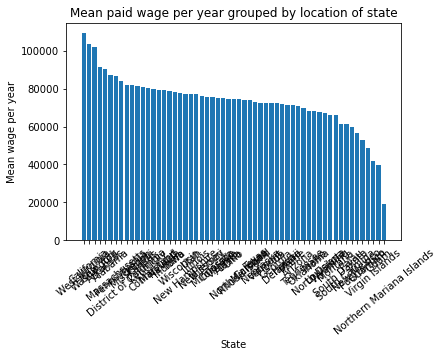

In [91]:
#mean paid wage per year grouped by location of state
graph = pd.DataFrame(salary.groupby(['WORK_STATE'])['PAID_WAGE_PER_YEAR'].mean()).reset_index()
graph = graph.sort_values('PAID_WAGE_PER_YEAR',ascending=False)
plt.bar(x='WORK_STATE', height='PAID_WAGE_PER_YEAR', data=graph)
plt.xticks(rotation=40)
plt.title('Mean paid wage per year grouped by location of state')
plt.xlabel('State')
plt.ylabel('Mean wage per year')
plt.savefig('wage_state.png', bbox_inches='tight', dpi=1300)

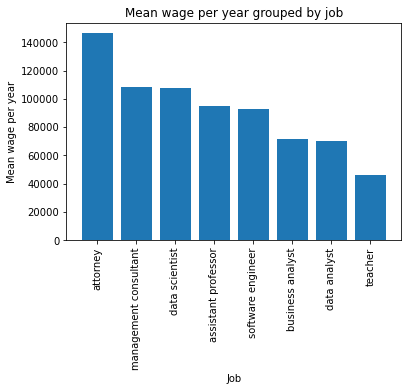

In [81]:
#mean paid wage per year grouped by JOB_TITLE_SUBGROUP
dfg = pd.DataFrame(salary.groupby(['JOB_TITLE_SUBGROUP'])['PAID_WAGE_PER_YEAR'].mean()).reset_index()
dfg = dfg.sort_values('PAID_WAGE_PER_YEAR',ascending=False)
plt.bar(x='JOB_TITLE_SUBGROUP', height='PAID_WAGE_PER_YEAR', data=dfg)
plt.xticks(rotation=90)
plt.title('Mean wage per year grouped by job')
plt.xlabel('Job')
plt.ylabel('Mean wage per year')
plt.savefig('wage_job.png', bbox_inches='tight', dpi=1200)

In [57]:
#mean paid wage per city
salary[salary["WORK_STATE"] == "West Virginia"].groupby(['WORK_CITY'])['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=False).head()

WORK_CITY
WHEELING         316641.00
POINT PLEASANT   250000.00
FAIRMONT         190750.00
HURRICANE        187500.00
Morgangtown      185902.00
Name: PAID_WAGE_PER_YEAR, dtype: float64

In [58]:
#mean paid wage per city
salary.groupby(['WORK_STATE'])['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=False).head()

WORK_STATE
West Virginia   109426.87
California      103571.11
Washington      102176.68
New York         91601.76
Arkansas         90270.75
Name: PAID_WAGE_PER_YEAR, dtype: float64

In [43]:
#
salary[salary["WORK_CITY"] == "WHEELING"]

,CASE_NUMBER,CASE_STATUS,CASE_RECEIVED_DATE,DECISION_DATE,EMPLOYER_NAME,JOB_TITLE,WORK_CITY,EDUCATION_LEVEL_REQUIRED,COLLEGE_MAJOR_REQUIRED,EXPERIENCE_REQUIRED_Y_N,...,PREVAILING_WAGE_SOC_TITLE,WORK_STATE,WORK_STATE_ABBREVIATION,WORK_POSTAL_CODE,FULL_TIME_POSITION_Y_N,VISA_CLASS,PREVAILING_WAGE_PER_YEAR,PAID_WAGE_PER_YEAR,JOB_TITLE_SUBGROUP,order
18324,I-200-13029-288152,certified,1/31/2013,2/6/2013,UNIVERSITY OF PITTSBURGH PHYSICIANS,CLINICAL ASSISTANT PROFESSOR,WHEELING,Nothing,Nothing,n,...,"Physicians and Surgeons, All Other",West Virginia,WV,Unknown,y,H-1B,108659.00,160000.00,assistant professor,18382
69100,I-200-13295-725173,certified,10/28/2013,11/1/2013,TESCRA INC,SOFTWARE ENGINEER,WHEELING,Nothing,Nothing,n,...,"Software Developers, Applications",Illinois,IL,Unknown,y,H-1B,76357.00,89502.00,software engineer,69183
73510,I-200-13135-795777,denied,5/16/2013,5/20/2013,"ITAK SEO, P.C.",ASSOCIATE ATTORNEY,WHEELING,Nothing,Nothing,n,...,Lawyers,Illinois,IL,Unknown,n,H-1B,74276.80,74276.80,attorney,73593
73511,I-200-13141-589322,certified,5/21/2013,5/28/2013,"ITAK SEO, P.C.",ASSOCIATE ATTORNEY,WHEELING,Nothing,Nothing,n,...,Lawyers,Illinois,IL,Unknown,n,H-1B,74276.80,74276.80,attorney,73594
104817,I-200-14083-829989,certified,3/24/2014,3/28/2014,"AIM BIG, INC.",SOFTWARE ENGINEER,WHEELING,Nothing,Nothing,n,...,Computer Systems Analysts,Illinois,IL,Unknown,y,H-1B,62525.00,63000.00,software engineer,104901
136852,I-200-14156-926803,certified,6/5/2014,6/11/2014,COMPASS GROUP USA INC.,BUSINESS ANALYST,WHEELING,Nothing,Nothing,n,...,"Business Operations Specialists, All Other",Illinois,IL,Unknown,y,H-1B,51667.00,53000.00,business analyst,136936
140551,I-200-12332-810024,certified,11/27/2012,12/3/2012,COMPASS GROUP USA INC.,BUSINESS ANALYST,WHEELING,Nothing,Nothing,n,...,"Business Operations Specialists, All Other",Illinois,IL,Unknown,y,H-1B,49587.00,53000.00,business analyst,140635
163321,I-200-13240-095256,certified,9/10/2013,9/18/2013,NATIONAL LOUIS UNIVERSITY,ENROLLMENT BUSINESS ANALYST,WHEELING,Nothing,Nothing,n,...,"Business Operations Specialists, All Other",Illinois,IL,Unknown,y,H-1B,33800.00,44000.00,business analyst,163405
164896,I-200-13164-398788,certified,6/13/2013,6/19/2013,WEST VIRGINIA UNIVERSITY,ASSISTANT PROFESSOR,WHEELING,Nothing,Nothing,n,...,"Health Specialties Teachers, Postsecondary",West Virginia,WV,Unknown,y,H-1B,30877.00,473282.00,assistant professor,164980


In [63]:
#Mean Salary San Francisco
salary[salary["WORK_CITY"] == "San Francisco"]['PAID_WAGE_PER_YEAR'].mean()

123850.62089219331

In [64]:
#Highest mean per city
salary.groupby(['WORK_CITY'])['PAID_WAGE_PER_YEAR'].mean().sort_values(ascending=False)

WORK_CITY
MINNEAPOLIS MN         960000.00
FT WORTH               489835.33
Toledo                 450000.00
ATLNTA                 415000.00
DISTRICT OF COLUMBIA   361993.30
                          ...   
PAWLEYS ISLAND          17680.00
ST MARY OF THE WOODS    17643.60
HOLLIDAYSBURG           17000.00
ROTA                    16764.80
BEND                    12000.00
Name: PAID_WAGE_PER_YEAR, Length: 4889, dtype: float64

In [74]:
#Hightest payment
salary[["JOB_TITLE", "WORK_CITY", "PAID_WAGE_PER_YEAR"]].sort_values("PAID_WAGE_PER_YEAR" , ascending=False)

,JOB_TITLE,WORK_CITY,PAID_WAGE_PER_YEAR
232,ASSOCIATE ATTORNEY,WASHINGTON DC,2500000.00
160,ATTORNEY,NEW YORK,2400000.00
266,ATTORNEY,WASHINGTON,2400000.00
267,ATTORNEY,DISTRICT OF COLUMBIA,2400000.00
268,ATTORNEY,"WASHINGTON, D.C",2400000.00
...,...,...,...
167275,TEACHER,SAIPAN,10920.00
167276,PRESCHOOL TEACHER,SAIPAN,10608.00
167267,PRESCHOOL TEACHER,SAIPAN,10504.00
167277,PRESCHOOL TEACHER,SAIPAN,10504.00
